# Cifar10圖像分類
https://www.kaggle.com/c/cifar-10/

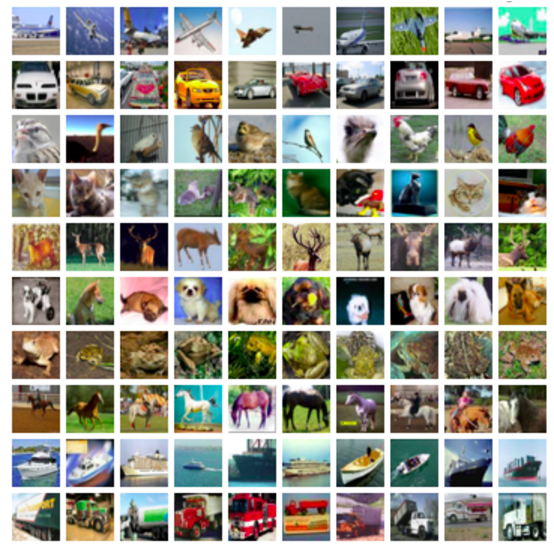

# ResNet

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 載入數據
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


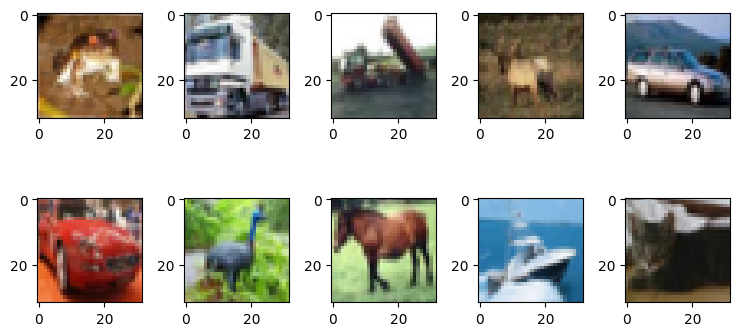

In [2]:
# 看一下資料樣貌
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
plt.tight_layout()
plt.show()

In [2]:
# 標準化資料到 [0, 1] 範圍
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 將標籤轉換為 one-hot 編碼
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
# 使用預訓練的 ResNet50 模型，去除頂層
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 凍結預訓練模型的權重
base_model.trainable = False

# 添加自定義分類層
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # CIFAR-10 有 10 個類別
])

# 顯示模型結構
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# 訓練模型
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.1214 - loss: 2.3390 - val_accuracy: 0.2087 - val_loss: 2.2128
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.1520 - loss: 2.2131 - val_accuracy: 0.2413 - val_loss: 2.0998
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1579 - loss: 2.1825 - val_accuracy: 0.2599 - val_loss: 2.1129
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.1671 - loss: 2.1634 - val_accuracy: 0.2717 - val_loss: 2.0364
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1728 - loss: 2.1494 - val_accuracy: 0.2834 - val_loss: 2.0529
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1817 - loss: 2.1437 - val_accuracy: 0.2188 - val_loss: 2.0903
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1800 - loss: 2.1307 - val_accuracy: 0.2702 - val_loss: 2.0543
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1746 - loss: 2.1311 - val

In [7]:
# 評估模型
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3113 - loss: 1.9789
Test Loss: 1.9821847677230835, Test Accuracy: 0.30959999561309814


## Fine-tuning

In [12]:
# 使用預訓練的 ResNet50 模型，去除頂層
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 解凍部分 ResNet50
for layer in base_model.layers[-50:]:  # 解凍最後 50 層（可根據需求調整）
    layer.trainable = True

# 添加自定義分類層
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # CIFAR-10 有 10 個類別
])

# 顯示模型結構
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 24,061,706 (91.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.4671 - loss: 1.6930 - val_accuracy: 0.2788 - val_loss: 2.5696
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7151 - loss: 0.8767 - val_accuracy: 0.3596 - val_loss: 2.2390
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.6558 - loss: 1.0472 - val_accuracy: 0.6303 - val_loss: 1.2483
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.7071 - loss: 0.8812 - val_accuracy: 0.4083 - val_loss: 1.6979
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.6822 - loss: 0.9436 - val_accuracy: 0.6222 - val_loss: 1.1613
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7105 - loss: 0.8716 - val_accuracy: 0.6971 - val_loss: 0.8900
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7617 - loss: 0.7244 - val_accuracy: 0.4836 - val_loss: 1.6329
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.7230 - loss: 0.8342 -

In [14]:
# 評估模型
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4661 - loss: 1.9468
Test Loss: 1.9333945512771606, Test Accuracy: 0.46860000491142273


## Data Augmentation數據增強

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 使用預訓練的 ResNet50 模型，去除頂層
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 凍結預訓練模型的權重
base_model.trainable = False

# 添加自定義分類層
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # CIFAR-10 有 10 個類別
])


# 定義數據增強策略
datagen = ImageDataGenerator(
    rotation_range=15,      # 隨機旋轉
    width_shift_range=0.1,  # 隨機水平平移
    height_shift_range=0.1, # 隨機垂直平移
    horizontal_flip=True    # 隨機水平翻轉
)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 增強數據並訓練
history_aug = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 77ms/step - accuracy: 0.1184 - loss: 2.3722 - val_accuracy: 0.2048 - val_loss: 2.1655
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.1437 - loss: 2.2216 - val_accuracy: 0.2246 - val_loss: 2.1287
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.1505 - loss: 2.1987 - val_accuracy: 0.2526 - val_loss: 2.1012
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.1569 - loss: 2.1889 - val_accuracy: 0.2489 - val_loss: 2.0974
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.1613 - loss: 2.1823 - val_accuracy: 0.2397 - val_loss: 2.0737
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.1657 - loss: 2.1753 - val_accuracy: 0.2560 - val_loss: 2.0374
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.1640 - loss: 2.1773 - val_accuracy: 0.2623 - val_loss: 2.0349
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.1614 - loss: 2.1679 - val_accurac

In [4]:
# 評估模型
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2735 - loss: 2.0545
Test Loss: 2.0550789833068848, Test Accuracy: 0.2745000123977661


# ViT

In [3]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# 載入數據
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 隨機抽取部分數據
# x_train_sample, _, y_train_sample, _ = train_test_split(
#     x_train, y_train, test_size=0.9, random_state=42
# )

# x_test_sample, _, y_test_sample, _ = train_test_split(
#     x_test, y_test, test_size=0.9, random_state=42
# )


In [ ]:
# 正規化影像資料
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 將影像調整為 ViT 所需的大小 (224x224)
x_train_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in x_train])
x_test_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in x_test])

In [2]:
# 加載預訓練的 ViT 模型
from transformers import TFViTForImageClassification

model = TFViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=10  # CIFAR-10 有 10 個類別
)

model.summary()

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_vi_t_for_image_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit (TFViTMainLayer)        multiple                  85798656  
                                                                 
 classifier (Dense)          multiple                  7690      
                                                                 
Total params: 85806346 (327.33 MB)
Trainable params: 85806346 (327.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(
    x_train_resized, y_train,
    validation_data=(x_test_resized, y_test),
    epochs=10,
    batch_size=64
)

In [ ]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

## Fine-tuning

In [ ]:
# 加載預訓練的 ViT 模型
from transformers import TFViTForImageClassification

model = TFViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=10  # CIFAR-10 有 10 個類別
)

for layer in model.layers[:-5]:  # 凍結後面5層
    layer.trainable = False

model.summary()

In [ ]:
# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(
    x_train_resized, y_train,
    validation_data=(x_test_resized, y_test),
    epochs=10,
    batch_size=64
)

In [ ]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

## LoRA in ViT
基本上TF很難用，要自訂一lora，torch有PEFT（Parameter Efficient Fine-Tuning）可以用，可能更直觀一點

In [ ]:
# from transformers import AutoModelForImageClassification, AutoProcessor
# from peft import LoraConfig, get_peft_model

# # 加載預訓練模型
# base_model = AutoModelForImageClassification.from_pretrained(
#     "google/vit-base-patch16-224-in21k",
#     num_labels=10  # CIFAR-10 有 10 個類別
# )

# # 定義 LoRA 配置
# lora_config = LoraConfig(
#     r=8,  # LoRA 的秩（越小越省資源）
#     lora_alpha=32,  # 總體縮放係數
#     target_modules=["attention"],  # 指定插入 LoRA 的目標層
#     lora_dropout=0.1,  # Dropout 防止過擬合
#     bias="none"  # 不更新 bias
# )

# # 為模型加載 LoRA
# model = get_peft_model(base_model, lora_config)


In [ ]:
from transformers import TFViTForImageClassification, ViTFeatureExtractor

# 加載預訓練 ViT 模型
model = TFViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=10  # CIFAR-10 有 10 個類別
)


In [ ]:
# 自定義 LoRA 層（低秩適配器）
import tensorflow as tf
from tensorflow.keras.layers import Layer

class LoRALayer(Layer):
    def __init__(self, original_dim, r=8, alpha=32, **kwargs):
        super(LoRALayer, self).__init__(**kwargs)
        self.r = r
        self.alpha = alpha
        self.scale = alpha / r

        # 定義 LoRA 的可訓練參數
        self.A = self.add_weight(shape=(original_dim, r), initializer="random_normal", trainable=True)
        self.B = self.add_weight(shape=(r, original_dim), initializer="random_normal", trainable=True)

    def call(self, inputs):
        # LoRA = scale * (inputs @ A @ B)
        return inputs + self.scale * tf.matmul(tf.matmul(inputs, self.A), self.B)


In [ ]:
# 掃描模型的層，插入 LoRA 層
for layer in model.layers:
    if "attention" in layer.name:  # 針對注意力層
        query_layer = layer.attention.self.query
        key_layer = layer.attention.self.key

        # 替換 Query 和 Key 為 LoRALayer
        query_layer.kernel = LoRALayer(query_layer.kernel.shape[1], r=8, alpha=32)(query_layer.kernel)
        key_layer.kernel = LoRALayer(key_layer.kernel.shape[1], r=8, alpha=32)(key_layer.kernel)


In [ ]:
# 凍結所有層，僅訓練 LoRA
for layer in vit_model.layers:
    layer.trainable = False

# 解凍 LoRA 的層
for layer in vit_model.layers:
    if isinstance(layer, LoRALayer):
        layer.trainable = True


In [ ]:
# 開train，基本上後面都一樣

# 編譯模型
vit_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = vit_model.fit(
    x_train_resized, y_train,
    validation_data=(x_test_resized, y_test),
    epochs=10,
    batch_size=64
)

In [ ]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")